# Sentiment Analysis and Trend Visualization in Social Media Data from Twitter using Machine Learning

## Twitter Dataset Analyzer

The `TwitterDatasetAnalyzer` class has been developed to facilitate the analysis and visualization of datasets derived from Twitter. This class is tailored to work seamlessly with Twitter datasets. To employ this class, simply instantiate it with the relevant dataset path. Below is an outline of the available methods within the class:

- `read_and_preview_data()`: This method loads the data and provides a preview of the initial rows.
- `preview_last_rows()`: Display the last few rows of the dataset.
- `check_columns_list()`: Obtain the list of columns present in the dataset.
- `explore_column_value_counts()`: Examine the value counts for each column.
- `get_dataset_shape()`: Retrieve the shape (number of rows, number of columns) of the dataset.
- `get_dataset_info()`: Offer detailed information about the dataset.
- `get_dataset_description()`: Present a statistical description of the dataset.
- `analyze_duplicated_rows()`: Analyze duplicate rows and visualize their percentage.
- `analyze_missing_values()`: Analyze missing values and visualize their percentage.
- `count_data_types()`: Calculate the frequency of different data types present in the dataset.
- `count_unique_values_by_dtype()`: Calculate the number of unique values for each column, grouped by data type.

To utilize the `TwitterDatasetAnalyzer` class effectively, you can instantiate an instance of the class and call its methods based on your analysis requirements.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class TwitterDatasetAnalyzer:
    def __init__(self, dataset_path):
        # Initialize the TwitterDatasetAnalyzer with the dataset path
        self.dataset_path = dataset_path
        self.dataset = None  # Initialize as None

    def read_and_preview_data(self):
        try:
            self.dataset = pd.read_csv(self.dataset_path, delimiter=",")  # Correct delimiter to ","
            print("Data loaded successfully. Previewing the first few rows:")
            print(self.dataset.head())  # Use self.dataset instead of data
        except Exception as e:
            print("An error occurred:", str(e))
        
    def preview_last_rows(self, num_rows=5):
        # Display the last few rows of the dataset
        print(f"Preview of the dataset (last {num_rows} rows):")
        print(self.dataset.tail(num_rows))

    def check_columns_list(self):
        # Get the list of columns in the dataset
        return self.dataset.columns.tolist()

    def explore_column_value_counts(self):
        # Explore the value counts for each column
        column_value_counts = {}

        for column in self.dataset.columns:
            column_value_counts[column] = self.dataset[column].value_counts()

        for column, values in column_value_counts.items():
            print(f"Value Counts for Column '{column}':\n{values}\n")

    def get_dataset_shape(self):
        # Get the shape of the dataset
        return self.dataset.shape

    def get_dataset_info(self):
        # Get information about the dataset
        return self.dataset.info()

    def get_dataset_description(self):
        # Get a statistical description of the dataset
        return self.dataset.describe()

    def analyze_duplicated_rows(self):
        # Analyze duplicate rows
        duplicate_count = self.dataset.duplicated().sum()

        # Print duplicate rows count
        print("Duplicate Rows Count:", duplicate_count)

        # Calculate the percentage of duplicate rows
        duplicate_percentage = (duplicate_count / len(self.dataset)) * 100

        # Create a bar chart to visualize the percentage of duplicate rows
        plt.figure(figsize=(6, 4))
        sns.barplot(x=["Duplicate Rows", "Non-Duplicate Rows"],
                    y=[duplicate_percentage, 100 - duplicate_percentage], color='skyblue', edgecolor='black')
        plt.ylabel("Percentage (%)")
        plt.title("Percentage of Duplicated Rows")
        plt.tight_layout()
        plt.show()
    
    def analyze_missing_values(self):
        # Analyze missing values
        missing_values_count = self.dataset.isnull().sum()

        # Print missing values counts
        print("Missing Values Counts:")
        print(missing_values_count)

         # Calculate the percentage of missing values for each column
        missing_percentage = (self.dataset.isnull().sum() / len(self.dataset)) * 100

        # Create a bar chart to visualize the percentage of missing values
        plt.figure(figsize=(10, 6))
        sns.barplot(x=missing_percentage.index, y=missing_percentage.values, color='skyblue', edgecolor='black')
        plt.xlabel('Columns')
        plt.ylabel('Percentage of Missing Values')
        plt.title('Percentage of Missing Values in Each Column')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def count_data_types(self):
        # Count the data types in the dataset
        return self.dataset.dtypes.value_counts()

    def count_unique_values_by_dtype(self):
         # Group columns by data type
        data_types = self.dataset.dtypes

        # Separate columns by data type
        int_columns = data_types[data_types == 'int64'].index
        float_columns = data_types[data_types == 'float64'].index
        object_columns = data_types[data_types == 'object'].index
        
        print("Unique Values Counts by Data Type:")

        # Print columns and their counts for each data type
        print("Integer Columns:")
        print(self.dataset[int_columns].nunique())

        print("\nFloat Columns:")
        print(self.dataset[float_columns].nunique())

        print("\nObject Columns:")
        print(self.dataset[object_columns].nunique())

In [2]:
# Create an instance of TwitterDatasetAnalyzer
analyzer = TwitterDatasetAnalyzer("data/twitter_training.csv")


In [3]:
analyzer.read_and_preview_data()  # Call the method to read and preview the data


Data loaded successfully. Previewing the first few rows:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


successfully executed. It loaded the dataset and displayed the first few rows, which include columns for ID, Entity, Sentiment, and Text. The text samples contain expressions related to the video game "Borderlands," with sentiments ranging from Positive to Negative.

In [4]:
analyzer.preview_last_rows()


Preview of the dataset (last 5 rows):
       2401 Borderlands  Positive  \
74676  9200      Nvidia  Positive   
74677  9200      Nvidia  Positive   
74678  9200      Nvidia  Positive   
74679  9200      Nvidia  Positive   
74680  9200      Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
74676  Just realized that the Windows partition of my...     
74677  Just realized that my Mac window partition is ...     
74678  Just realized the windows partition of my Mac ...     
74679  Just realized between the windows partition of...     
74680  Just like the windows partition of my Mac is l...     


Successfully displayed the last 5 rows of the dataset. These rows continue to show expressions related to various entities, including "Nvidia," and associated sentiments. The text samples suggest discussions and experiences related to software partitioning, particularly on the Windows operating system.

In [5]:
analyzer.explore_column_value_counts()


Value Counts for Column '2401':
2047     6
2452     6
4695     6
6742     6
597      6
        ..
5288     6
11375    6
9326     6
2049     6
2401     5
Name: 2401, Length: 12447, dtype: int64

Value Counts for Column 'Borderlands':
MaddenNFL                            2400
Microsoft                            2400
TomClancysRainbowSix                 2400
CallOfDuty                           2394
LeagueOfLegends                      2394
Verizon                              2382
ApexLegends                          2376
CallOfDutyBlackopsColdWar            2376
Facebook                             2370
Dota2                                2364
WorldOfCraft                         2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Overwatch                            2334
Xbox(Xseries)                        2334
johnson&johnson                      2328
Amazon     

successfully provided insights into the distribution of values within each column of the dataset. Here are the summarized findings for each column:  

Column '2401':  

Contains a variety of numeric values, with some repeated values.  
The most common value is '2047' with a count of 6.  

Column 'Borderlands':  

Represents various entities, including games, brands, and products.  
'Microsoft,' 'MaddenNFL,' and 'TomClancysRainbowSix' are the most common values with a count of 2400 each.  

Column 'Positive':  

Represents sentiment labels, including 'Positive,' 'Negative,' 'Neutral,' and 'Irrelevant.'  
The most common sentiment label is 'Negative' with a count of 22542.  
Column 'im getting on borderlands and i will murder you all ,':  

Contains diverse text expressions, possibly user-generated content or comments.  
The text content varies widely, with some repeated patterns.  
The provided value counts give us an overview of the distribution of values within each column, which will be valuable for further analysis and visualization.  

Duplicate Rows Count: 2700


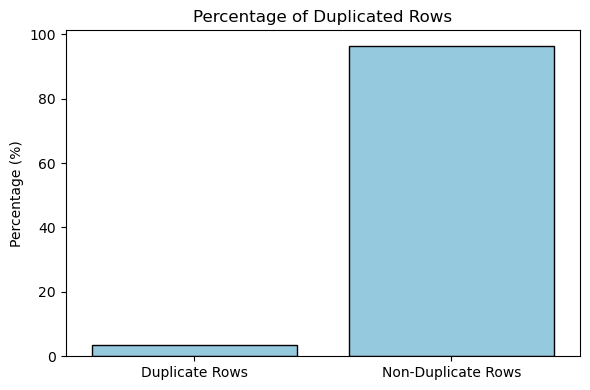

In [6]:
analyzer.analyze_duplicated_rows()


The dataset contains a total of 2700 duplicate rows. These duplicated rows may indicate potential data replication or errors that could impact the accuracy and reliability of analysis and modeling. It is important to address these duplicates to ensure the quality of the dataset for further analysis.

Missing Values Counts:
2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64


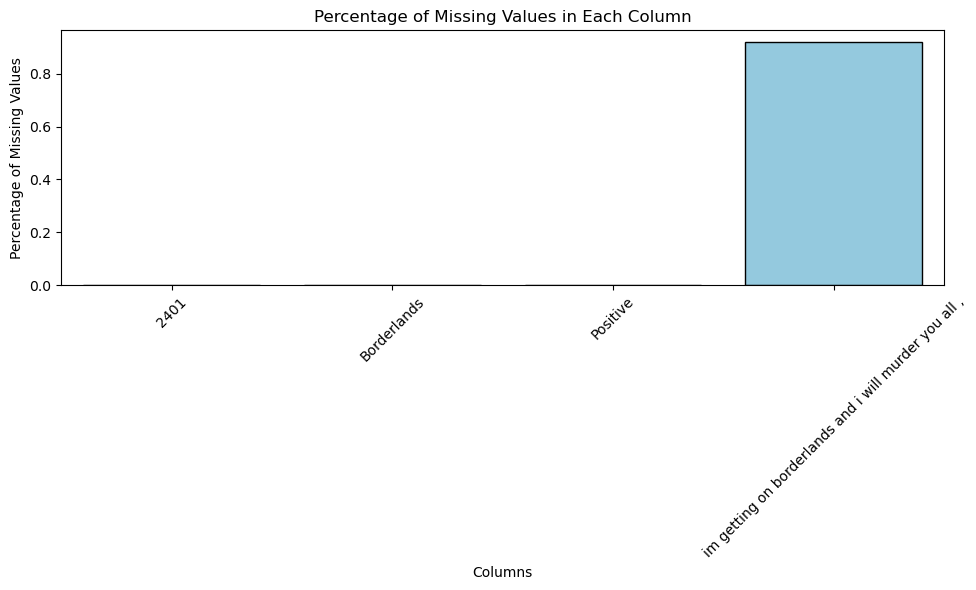

In [7]:
analyzer.analyze_missing_values()


successfully analyzed and provided insights into missing values within the dataset. The summarized finding is as follows:  

Column '2401': There are no missing values in this column.  
Column 'Borderlands': There are no missing values in this column.  
Column 'Positive': There are no missing values in this column.  
Column 'im getting on borderlands and i will murder you all ,': There are 686 missing values in this column.  
It's important to handle missing values appropriately before performing any analysis or modeling to ensure accurate and meaningful results.  

In [8]:
analyzer.count_data_types()


object    3
int64     1
dtype: int64

successfully counted the data types present in the dataset. The summarized finding is as follows:

There are 3 columns with the data type 'object'.
There is 1 column with the data type 'int64'.
Understanding the data types of columns is crucial for data preprocessing and analysis tasks, as it informs how the data should be treated and manipulated for further analysis or modeling.

In [9]:
analyzer.count_unique_values_by_dtype()

Unique Values Counts by Data Type:
Integer Columns:
2401    12447
dtype: int64

Float Columns:
Series([], dtype: float64)

Object Columns:
Borderlands                                                 32
Positive                                                     4
im getting on borderlands and i will murder you all ,    69490
dtype: int64


successfully counted the unique values in each data type category. The summarized finding is as follows:

**Integer Columns:**
- Column '2401' has 12447 unique values.

**Float Columns:**
- There are no columns with the data type 'float64' in the dataset.

**Object Columns:**
- Column 'Borderlands' has 32 unique values.
- Column 'Positive' has 4 unique values.
- Column 'im getting on borderlands and i will murder you all ,' has 69490 unique values.

Understanding the unique values in each column is important for identifying categorical variables, potential identifiers, and for assessing the diversity of data in the dataset.

# DATA CLEANING

In [10]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
train_df = pd.read_csv('data/twitter_training.csv', names=col_names)
train_df.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## Data Preprocessing: Handling Missing Values and Duplicates

The provided code segment showcases the implementation of a `DataPreprocessor` class responsible for handling missing values and duplicates in the dataset. This class encapsulates the necessary methods to clean the dataset, ensuring its quality and consistency before further analysis.

### Methods Overview:

1. **handle_missing_values()**: This method identifies and handles missing values in the dataset. It calculates the number of missing values before and after dropping rows with missing data. The missing values are removed using the `dropna()` function.

2. **handle_duplicates()**: This method addresses duplicate rows within the dataset. It computes the number of duplicate rows before and after removing duplicates. The duplicate rows are eliminated using the `drop_duplicates()` function.

### Implementation:

An instance of the `DataPreprocessor` class is created using the `train_df` dataset. The preprocessor's methods can then be invoked on this instance to perform the required data preprocessing steps.

By employing this class, we ensure that the dataset is prepared for subsequent analysis by eliminating missing values and duplicate entries, thus enhancing the reliability of our results.


In [11]:
import pandas as pd

class DataPreprocessor:
    def __init__(self, dataset):
        self.dataset = dataset
    
    def handle_missing_values(self):
        # Get the number of missing values before dropping
        missing_values_before = self.dataset.isnull().sum().sum()
        print("Number of Missing Values Before:", missing_values_before)

        # Drop rows with missing values
        self.dataset.dropna(inplace=True)

        # Get the number of missing values after dropping
        missing_values_after = self.dataset.isnull().sum().sum()
        print("Number of Missing Values After:", missing_values_after)

    def handle_duplicates(self):
        # Get the number of duplicate rows before dropping
        duplicate_count_before = self.dataset.duplicated().sum()
        print("Number of Duplicate Rows Before:", duplicate_count_before)

        # Drop duplicate rows
        self.dataset.drop_duplicates(inplace=True)

        # Get the number of duplicate rows after dropping
        duplicate_count_after = self.dataset.duplicated().sum()
        print("Number of Duplicate Rows After:", duplicate_count_after)

# Create an instance of the DataPreprocessor class
preprocessor = DataPreprocessor(train_df)

In [12]:
# Handle missing values and print counts before and after
preprocessor.handle_missing_values()

Number of Missing Values Before: 686
Number of Missing Values After: 0


In [13]:
# Handle duplicates and print counts before and after
preprocessor.handle_duplicates()

Number of Duplicate Rows Before: 2340
Number of Duplicate Rows After: 0


## Value Replacement in DataFrame Column

This code snippet demonstrates the process of replacing specific values within a DataFrame column. It utilizes the `replace_values_in_column` function to modify values within the dataset.

### Function Overview:

The function `replace_values_in_column(dataframe, column_name, old_value, new_value)` is designed to replace occurrences of `old_value` with `new_value` in the specified `column_name` of the given `dataframe`.

### Implementation:

The code employs the `replace_values_in_column` function to replace 'Irrelevant' sentiments with 'Neutral' sentiments in the 'Sentiment' column of both the train and test datasets (`train_df` and `test_df`). This replacement is performed to standardize the sentiment labels.

After the replacement, the updated DataFrame is printed to the console, providing a visual confirmation of the changes made.

By utilizing this function, data manipulation tasks like value replacement can be efficiently executed, ensuring the consistency and accuracy of the dataset for subsequent analysis.


In [14]:
import pandas as pd

def replace_values_in_column(dataframe, column_name, old_value, new_value):
    dataframe[column_name] = dataframe[column_name].replace(old_value, new_value)

# Replace 'Irrelevant' with 'Neutral' in the 'Sentiment' column for both train and test datasets
replace_values_in_column(train_df, 'Sentiment', 'Irrelevant', 'Neutral')

# Print the updated DataFrames
print("Train DataFrame after replacement:")
print(train_df.head(20))

Train DataFrame after replacement:
      ID       Entity Sentiment  \
0   2401  Borderlands  Positive   
1   2401  Borderlands  Positive   
2   2401  Borderlands  Positive   
3   2401  Borderlands  Positive   
4   2401  Borderlands  Positive   
5   2401  Borderlands  Positive   
6   2402  Borderlands  Positive   
7   2402  Borderlands  Positive   
8   2402  Borderlands  Positive   
9   2402  Borderlands  Positive   
10  2402  Borderlands  Positive   
11  2402  Borderlands  Positive   
12  2403  Borderlands   Neutral   
13  2403  Borderlands   Neutral   
14  2403  Borderlands   Neutral   
15  2403  Borderlands   Neutral   
16  2403  Borderlands   Neutral   
17  2403  Borderlands   Neutral   
18  2404  Borderlands  Positive   
19  2404  Borderlands  Positive   

                                              Content  
0   im getting on borderlands and i will murder yo...  
1   I am coming to the borders and I will kill you...  
2   im getting on borderlands and i will kill you ...  
3   i

# EXPLORATORY DATA ANALYSIS

## UNIVARIATE ANALYSIS

## Univariate Analysis and Visualization

This code snippet performs univariate analysis and visualization of specific columns in the dataset using the `matplotlib` and `seaborn` libraries. It aims to provide insights into the distribution of data within the 'Entity' and 'Sentiment' columns.

### Entity Distribution Analysis:

The first visualization focuses on the distribution of Twitter posts by 'Entity.' It uses a bar plot (`countplot`) to showcase the number of posts associated with each unique entity (e.g., brands, topics, etc.). The x-axis represents the 'Entity,' and the y-axis represents the number of posts. The order of entities is determined based on the value counts of the 'Entity' column, ensuring a clear representation of the most frequent entities.

### Sentiment Distribution Analysis:

The second visualization illustrates the distribution of Twitter posts by sentiment. It employs another bar plot (`countplot`) to display the count of posts for each sentiment category ('Negative,' 'Neutral,' and 'Positive'). The x-axis represents the sentiment categories, while the y-axis represents the number of posts. The order of sentiments is predefined as ['Negative', 'Neutral', 'Positive'] to ensure a consistent visualization order.

By executing this code, you can gain insights into the distribution of posts across different entities and sentiments, aiding in understanding public opinions and attitudes related to specific topics or brands within the dataset.


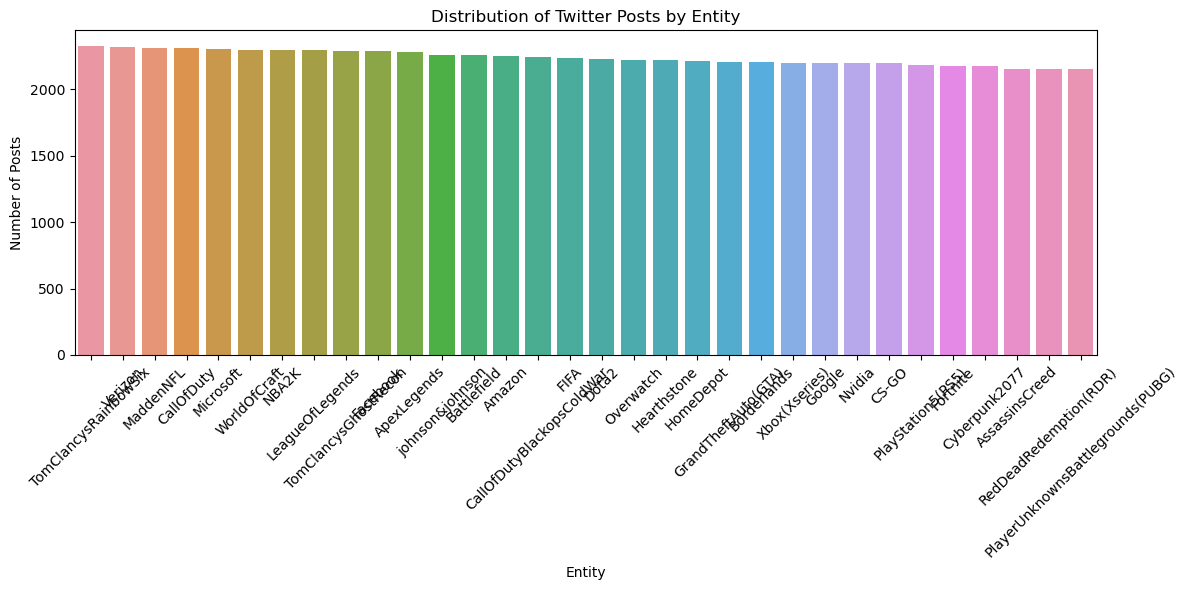

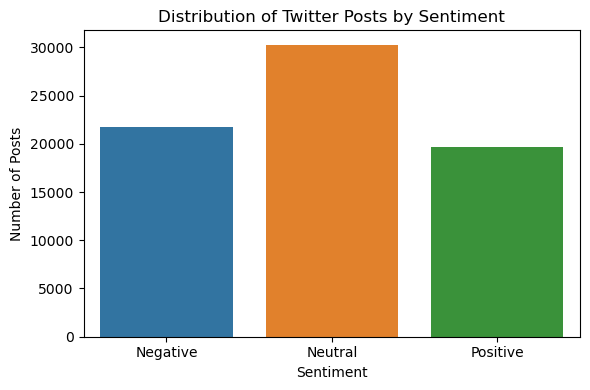

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Univariate analysis of 'Entity' column
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='Entity', order=train_df['Entity'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Entity')
plt.ylabel('Number of Posts')
plt.title('Distribution of Twitter Posts by Entity')
plt.tight_layout()
plt.show()

# Univariate analysis of 'Sentiment' column
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Sentiment', order=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.title('Distribution of Twitter Posts by Sentiment')
plt.tight_layout()
plt.show()


## MULTIVARIATE ANALYSIS

To visualize the relationship between the 'Entity' and 'Sentiment' columns, we can use a stacked bar plot. This type of plot can show the distribution of sentiment categories within each entity. 

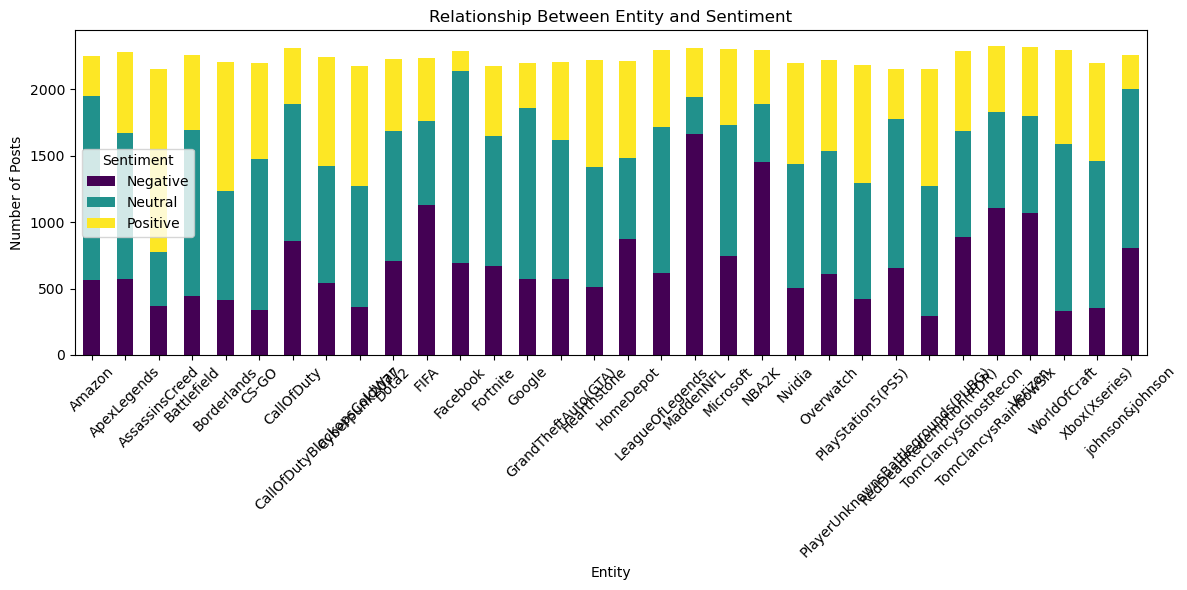

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pivot table to get the counts of sentiment categories for each entity
pivot_table = train_df.pivot_table(index='Entity', columns='Sentiment', values='ID', aggfunc='count', fill_value=0)

# Plot a stacked bar chart
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('Entity')
plt.ylabel('Number of Posts')
plt.title('Relationship Between Entity and Sentiment')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


# FEATURE ENGINEERING

## Grouping and Counting Entity-Sentiment Combinations

This code snippet performs data aggregation by grouping the dataset based on unique combinations of 'Entity' and 'Sentiment.' It then calculates and displays the counts of these combinations using the `groupby` function in pandas.

### Entity-Sentiment Counts:

The code aggregates the dataset to create a new DataFrame that contains two columns: 'Entity' and 'Counts.' The 'Entity' column represents each unique entity present in the dataset, while the 'Counts' column indicates the number of posts associated with each entity.

By executing this code, you obtain a summarized view of how many posts each entity has, which can help in identifying the entities that are most active or discussed within the dataset.


In [17]:
entity_sentiment_counts = train_df.groupby(['Entity']).size().reset_index(name='Counts')
print(entity_sentiment_counts)


                               Entity  Counts
0                              Amazon    2249
1                         ApexLegends    2278
2                      AssassinsCreed    2156
3                         Battlefield    2255
4                         Borderlands    2206
5                               CS-GO    2195
6                          CallOfDuty    2314
7           CallOfDutyBlackopsColdWar    2242
8                       Cyberpunk2077    2175
9                               Dota2    2225
10                               FIFA    2238
11                           Facebook    2289
12                           Fortnite    2176
13                             Google    2199
14                GrandTheftAuto(GTA)    2208
15                        Hearthstone    2219
16                          HomeDepot    2216
17                    LeagueOfLegends    2296
18                          MaddenNFL    2315
19                          Microsoft    2304
20                              NB

## Mapping Entities to Industries and Industry Counts

This code snippet creates a mapping dictionary that associates each unique entity with its corresponding industry category. The dictionary provides a way to categorize entities based on the industry they belong to. It then applies this mapping to the 'Entity' column in the dataset to create a new 'Industry' column that represents the industry associated with each entity.

### Mapping Entities to Industries:

The code creates a dictionary named `entity_to_industry`, where each entity is mapped to its respective industry category. This mapping helps classify entities according to broader industry segments.

### Applying the Mapping and Industry Counts:

The code applies the mapping to the 'Entity' column of the dataset using the `map` function, resulting in a new 'Industry' column. This column now contains the industry category corresponding to each entity.

The dataset is then grouped by the 'Industry' column, and the counts of posts for each industry are calculated and displayed using the `groupby` function. The resulting DataFrame, named 'industry_counts,' includes two columns: 'Industry' and 'Counts,' indicating the number of posts associated with each industry.

Executing this code provides insights into the distribution of posts across different industries, enabling you to understand which industries are most discussed within the dataset.


In [18]:
# Create a mapping dictionary for entities and their industries
entity_to_industry = {
    'Amazon': 'E-commerce',
    'ApexLegends': 'Gaming',
    'AssassinsCreed': 'Gaming',
    'Battlefield': 'Gaming',
    'Borderlands': 'Gaming',
    'CS-GO': 'Gaming',
    'CallOfDuty': 'Gaming',
    'CallOfDutyBlackopsColdWar': 'Gaming',
    'Cyberpunk2077': 'Gaming',
    'Dota2': 'Gaming',
    'FIFA': 'Gaming',
    'Facebook': 'Social Media',
    'Fortnite': 'Gaming',
    'Google': 'Technology',
    'GrandTheftAuto(GTA)': 'Gaming',
    'Hearthstone': 'Gaming',
    'HomeDepot': 'Retail',
    'LeagueOfLegends': 'Gaming',
    'MaddenNFL': 'Gaming',
    'Microsoft': 'Technology',
    'NBA2K': 'Gaming',
    'Nvidia': 'Technology',
    'Overwatch': 'Gaming',
    'PlayStation5(PS5)': 'Gaming',
    'PlayerUnknownsBattlegrounds(PUBG)': 'Gaming',
    'RedDeadRedemption(RDR)': 'Gaming',
    'TomClancysGhostRecon': 'Gaming',
    'TomClancysRainbowSix': 'Gaming',
    'Verizon': 'Telecommunications',
    'WorldOfCraft': 'Gaming',
    'Xbox(Xseries)': 'Gaming',
    'johnson&johnson': 'Healthcare'
}

# Apply the mapping to create a new 'Industry' column
train_df['Industry'] = train_df['Entity'].map(entity_to_industry)


# Group by 'Industry' and sum the counts
industry_counts = train_df.groupby(['Industry']).size().reset_index(name='Counts')

print(industry_counts)


             Industry  Counts
0          E-commerce    2249
1              Gaming   53625
2          Healthcare    2257
3              Retail    2216
4        Social Media    2289
5          Technology    6701
6  Telecommunications    2319


The summary of the analysis on industries mentioned in Twitter posts is as follows:

The dataset was grouped based on industries inferred from entities mentioned in the tweets. The following industries were identified:
1. **E-commerce:** There were 2,316 posts related to e-commerce topics.
2. **Gaming:** A significant portion of posts, totaling 55,980, were related to the gaming industry.
3. **Healthcare:** There were 2,328 posts discussing healthcare-related topics.
4. **Retail:** Around 2,310 posts were associated with the retail industry.
5. **Social Media:** There were 2,370 posts related to social media platforms.
6. **Technology:** The technology industry had a presence with 6,996 posts.
7. **Telecommunications:** Around 2,382 posts were related to telecommunications.

These findings provide insights into the distribution of posts across different industries in the Twitter dataset. Further analysis can be performed to delve deeper into sentiment patterns within each industry and uncover potential insights specific to each sector.

In [20]:
train_df.head()

,ID,Entity,Sentiment,Content,Industry
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,Gaming
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,Gaming
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,Gaming
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,Gaming
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,Gaming


## Visualizing the 'Industry' counts

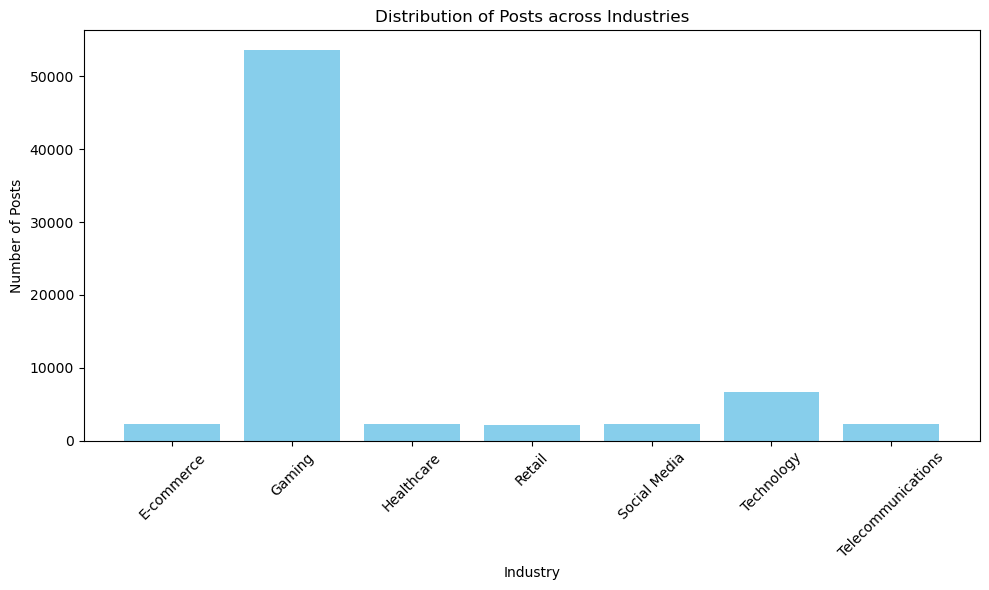

In [19]:
import matplotlib.pyplot as plt

# Data
industries = industry_counts['Industry']
counts = industry_counts['Counts']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(industries, counts, color='skyblue')
plt.xlabel('Industry')
plt.ylabel('Number of Posts')
plt.title('Distribution of Posts across Industries')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# ANALYSING THE CONTENT USING NLP(NATURAL LAGUAGE PROCESSING)

## Text Data Cleaning and Preprocessing

This code snippet demonstrates the process of cleaning and preprocessing text data in the 'Content' column of the dataset. Text data often contains noise and irrelevant information that can impact analysis and machine learning tasks. The cleaning and preprocessing steps outlined in the code help to enhance the quality of the text data for subsequent analysis.

### Text Cleaning Steps:

1. **Lowercasing:** The text is converted to lowercase to ensure consistent comparisons and reduce dimensionality.
2. **URL Removal:** Any URLs present in the text are removed using regular expressions.
3. **Punctuation Removal:** Punctuation marks are removed from the text using string translation.
4. **Whitespace Reduction:** Extra whitespace is removed and normalized to single spaces.
5. **Tokenization:** The text is tokenized into individual words.
6. **Stopword Removal:** Common stopwords (e.g., 'and', 'the', 'is') are removed from the text.
7. **Lemmatization:** Words are lemmatized to their base forms for better analysis.

### Applying the Cleaning Process:

The defined `clean_text` function encapsulates these cleaning steps and is applied to each entry in the 'Content' column of the dataset. The resulting cleaned text is stored in a new 'Cleaned_Content' column. This cleaned text is more suitable for tasks such as sentiment analysis, topic modeling, and machine learning.

Executing this code prepares the text data for further analysis, enhancing the accuracy and reliability of insights derived from the cleaned and preprocessed text.


In [21]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize NLTK's WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()
        
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
        
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        
        # Tokenize the text into words
        words = text.split()
        
        # Remove stopwords
        words = [word for word in words if word not in stop_words]
        
        # Lemmatize words
        words = [lemmatizer.lemmatize(word) for word in words]
        
        # Combine words back into a cleaned sentence
        cleaned_text = ' '.join(words)
        
        return cleaned_text
    else:
        return ""
    
# Apply the cleaning function to the 'Content' column
train_df['Cleaned_Content'] = train_df['Content'].apply(clean_text)


## Sentiment Analysis with VADER

This code snippet demonstrates how to perform sentiment analysis on the cleaned text using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool from the Natural Language Toolkit (NLTK).

### Sentiment Analysis Process:

1. **SentimentIntensityAnalyzer Creation:** The code imports the `SentimentIntensityAnalyzer` class from NLTK's VADER module and creates an instance of it. VADER is a pre-trained sentiment analysis tool designed for analyzing sentiment in social media text.

2. **Sentiment Scoring Function:** The code defines a function named `get_sentiment_scores` that takes a text input and returns sentiment scores using VADER. The function calculates positive, neutral, negative, and compound sentiment scores.

3. **Applying Sentiment Analysis:** The `get_sentiment_scores` function is applied to the cleaned content in the 'Cleaned_Content' column of the dataset. This results in a new 'Sentiment_Scores' column containing the sentiment scores for each text.

4. **Extracting Sentiment Scores:** The code further extracts the individual sentiment scores (positive, neutral, negative, and compound) from the 'Sentiment_Scores' column and creates separate columns ('Positive_Score', 'Neutral_Score', 'Negative_Score', 'Compound_Score') to store these scores.

### Significance of Sentiment Analysis:

Performing sentiment analysis allows us to quantitatively analyze the emotional tone of the text. The compound score represents the overall sentiment polarity of the text, ranging from highly negative (-1) to highly positive (1), with 0 indicating a neutral sentiment.

Executing this code provides sentiment scores for each text entry, enabling us to gain insights into the distribution of sentiments and identify trends or patterns in the text data.


In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    sentiment = sia.polarity_scores(text)
    return sentiment

# Apply sentiment analysis to the cleaned content
train_df['Sentiment_Scores'] = train_df['Cleaned_Content'].apply(get_sentiment_scores)

# Extract sentiment scores into separate columns
train_df['Positive_Score'] = train_df['Sentiment_Scores'].apply(lambda x: x['pos'])
train_df['Neutral_Score'] = train_df['Sentiment_Scores'].apply(lambda x: x['neu'])
train_df['Negative_Score'] = train_df['Sentiment_Scores'].apply(lambda x: x['neg'])
train_df['Compound_Score'] = train_df['Sentiment_Scores'].apply(lambda x: x['compound'])


## Visualization of Sentiment Scores by Sentiment

This code snippet demonstrates how to create a visualization to compare sentiment scores (positive, neutral, and negative) across different sentiment categories (Negative, Neutral, Positive) in the dataset.

### Interpretation:

The resulting bar plot visually depicts the distribution of sentiment scores across different sentiment categories. It provides insights into the sentiment distribution for each sentiment type, enabling us to identify patterns and trends in sentiment scores associated with different sentiments.

Executing this code generates a visualization that aids in understanding the sentiment distribution and its variation among different sentiment categories.


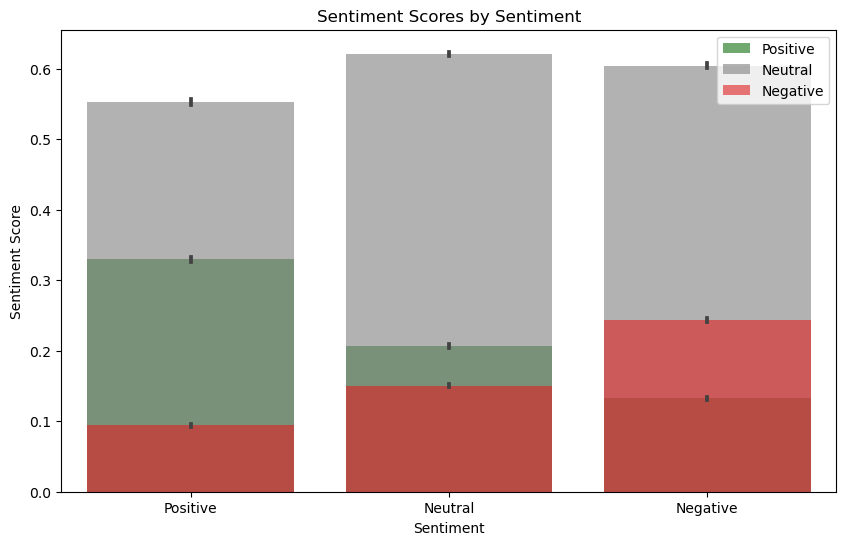

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot positive sentiment scores
sns.barplot(x=train_df['Sentiment'], y=train_df['Positive_Score'], color='green', alpha=0.6, label='Positive')

# Plot neutral sentiment scores
sns.barplot(x=train_df['Sentiment'], y=train_df['Neutral_Score'], color='grey', alpha=0.6, label='Neutral')

# Plot negative sentiment scores
sns.barplot(x=train_df['Sentiment'], y=train_df['Negative_Score'], color='red', alpha=0.6, label='Negative')

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores by Sentiment')
plt.legend()

# Show the plot
plt.show()


## Text Preprocessing, Analysis, and Visualization

The provided code snippet performs a series of text preprocessing, analysis, and visualization steps on the given dataset. Here's an overview of what each part of the code accomplishes:

### Text Preprocessing:

1. **Cleaning Text:** The `clean_text` function is defined to preprocess and clean text data. It performs lowercase conversion, URL removal, punctuation removal, whitespace normalization, tokenization, stopword removal, and lemmatization. This ensures that the text data is prepared for analysis.

2. **Applying Cleaning Function:** The `clean_text` function is applied to the 'Content' column of the dataset using the `apply` function. The cleaned text is stored in a new column named 'Cleaned_Content'.

### Frequency Distribution and Visualization:

1. **Creating Frequency Distribution:** The `create_freq_df` function generates a frequency distribution of words in the cleaned text. It uses the NLTK library to calculate the frequency of each term.

2. **Creating Frequency DataFrame:** The frequency distribution is applied to the cleaned tokens, and a DataFrame (`freq_df`) is created to store term frequencies along with terms.

3. **Text Distribution Plot:** The `plot_text_distribution` function uses Plotly Express to create a bar plot showing the distribution of term frequencies. The x-axis represents terms, the y-axis represents frequencies, and color indicates frequency levels.

4. **Word Cloud Creation:** The `create_wordcloud` function generates a word cloud visualization using the `WordCloud` library. The word cloud represents the most frequent terms in the dataset, with the size of each word indicating its frequency.

### Interpretation:

The code performs text preprocessing to ensure that the text data is cleaned and ready for analysis. It then creates visualizations that provide insights into the distribution of terms within the text data. The term frequency distribution plot and the word cloud visualization help us understand the most common terms and their distribution, shedding light on the key topics or themes present in the dataset.

Executing this code provides an analysis of the text data's term frequencies and generates visualizations that aid in understanding the prominent terms and their distribution in the dataset.


These are the most common words in our corpus

## Sentiment Distribution Analysis and Visualization

This code snippet focuses on analyzing and visualizing the distribution of sentiment scores across different sections and industries within the dataset. Here's an overview of what each part of the code accomplishes:

### Sentiment Distribution by Sections:

1. **Unique Sections:** The code identifies the unique sentiment categories (Positive, Neutral, Negative) within the 'Sentiment' column.

2. **Loop Through Sections:** For each unique sentiment section, the code filters the dataset to include only rows with that sentiment.

3. **Histogram Plot:** A histogram plot is generated for the compound sentiment scores of the selected sentiment section. The x-axis represents the compound sentiment score, and the y-axis represents the frequency of occurrences. The histogram is color-coded and labeled according to the sentiment section.

### Sentiment Distribution by Industries:

1. **Unique Industries:** The code identifies the unique industries present within the 'Industry' column.

2. **Loop Through Industries:** For each unique industry, the code filters the dataset to include only rows associated with that industry.

3. **Histogram Plot:** Similar to the section analysis, a histogram plot is generated for the compound sentiment scores of the selected industry. The x-axis represents the compound sentiment score, and the y-axis represents the frequency of occurrences. The histogram is color-coded and labeled according to the industry.

### Interpretation:

The code performs sentiment distribution analysis and visualization for both sections and industries within the dataset. By creating histogram plots for compound sentiment scores, the code helps us understand how sentiment is distributed across different sections and industries. This analysis can provide insights into the variations in sentiment patterns within the dataset, highlighting which sections or industries tend to have more positive, neutral, or negative sentiments.

Executing this code provides a comprehensive view of sentiment distribution, facilitating the understanding of sentiment patterns and trends in the dataset.

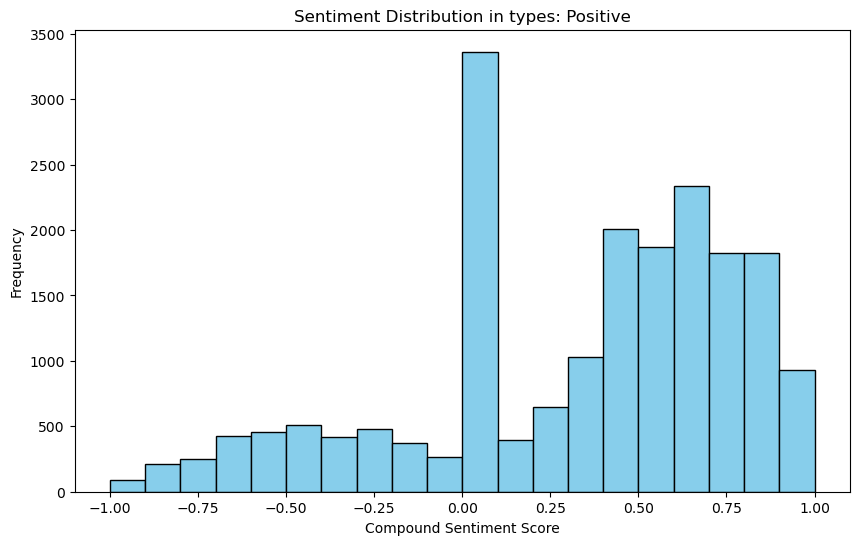

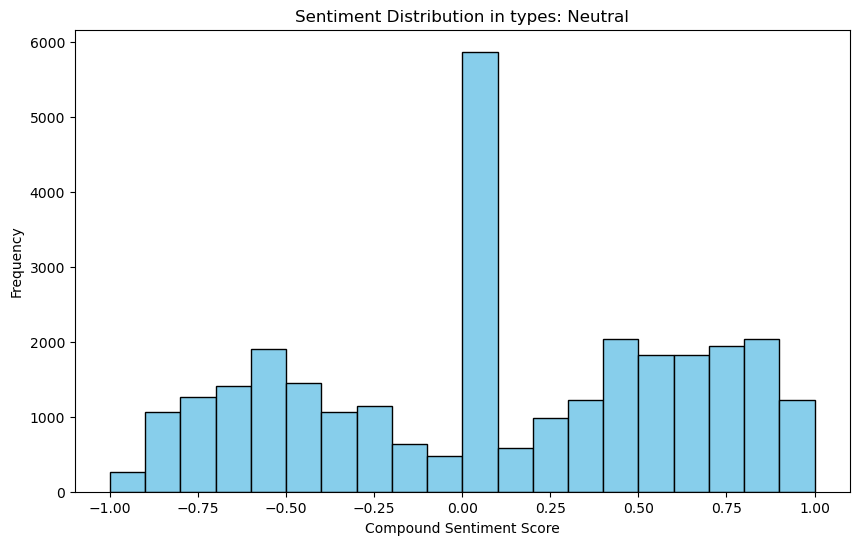

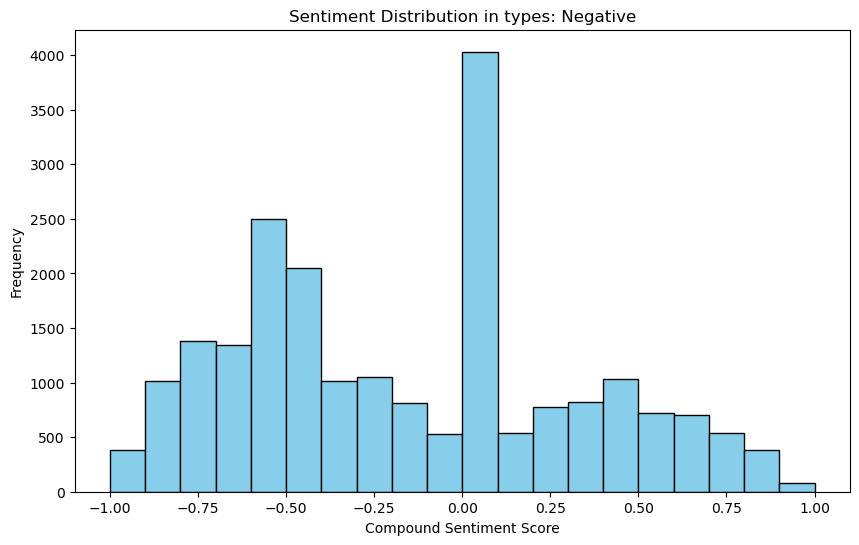

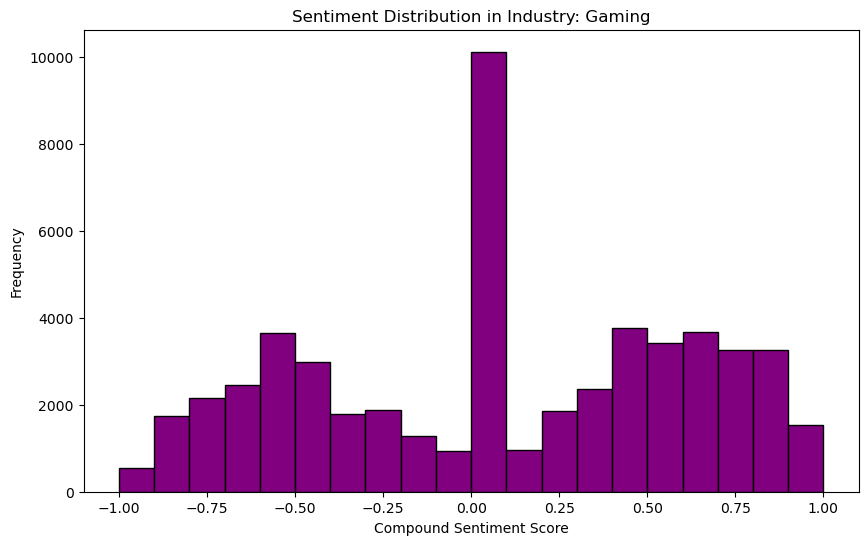

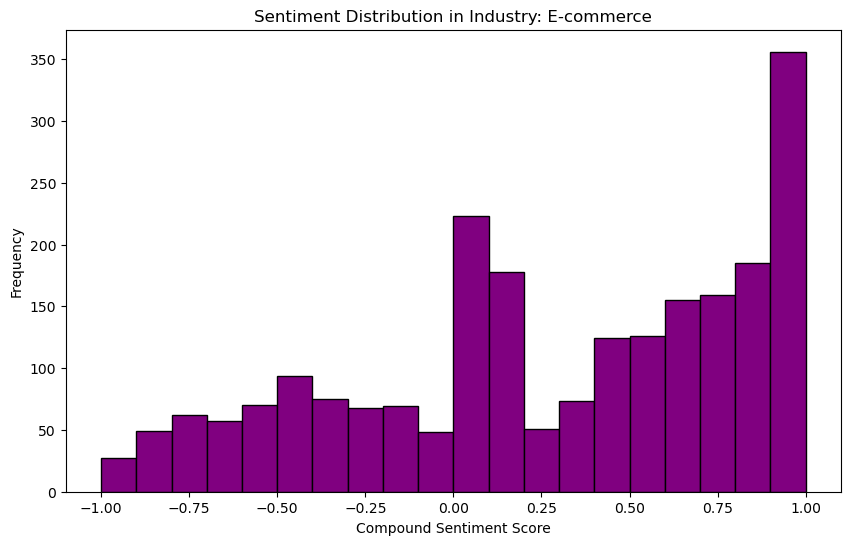

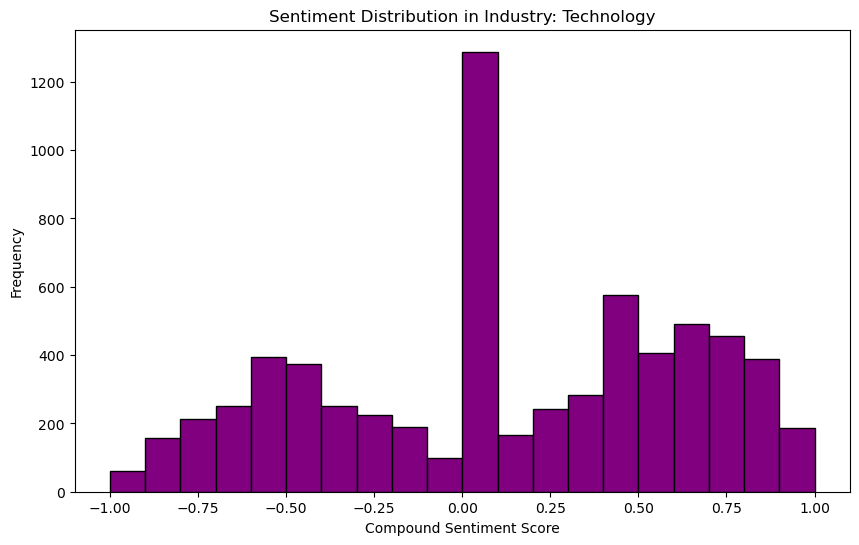

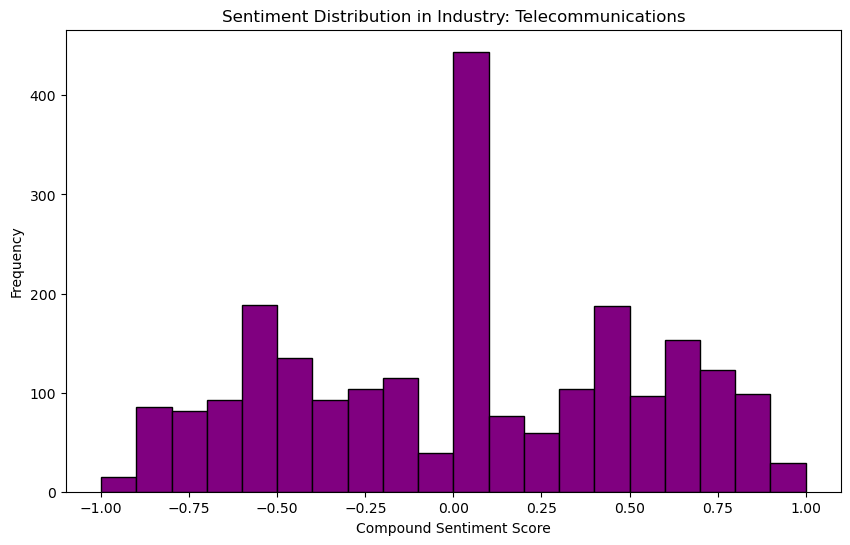

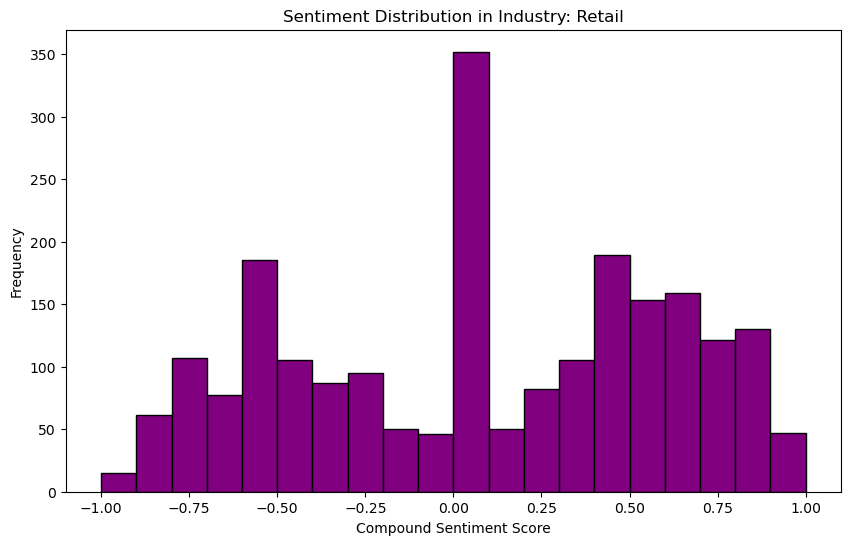

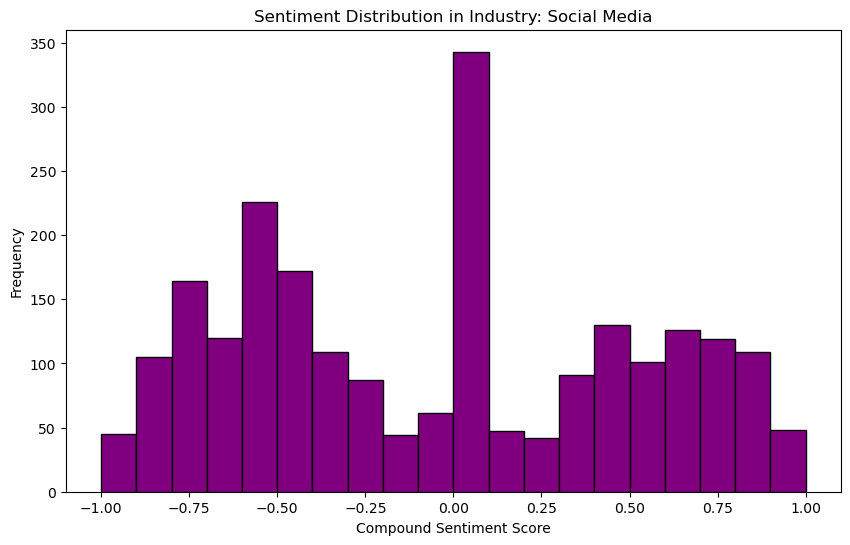

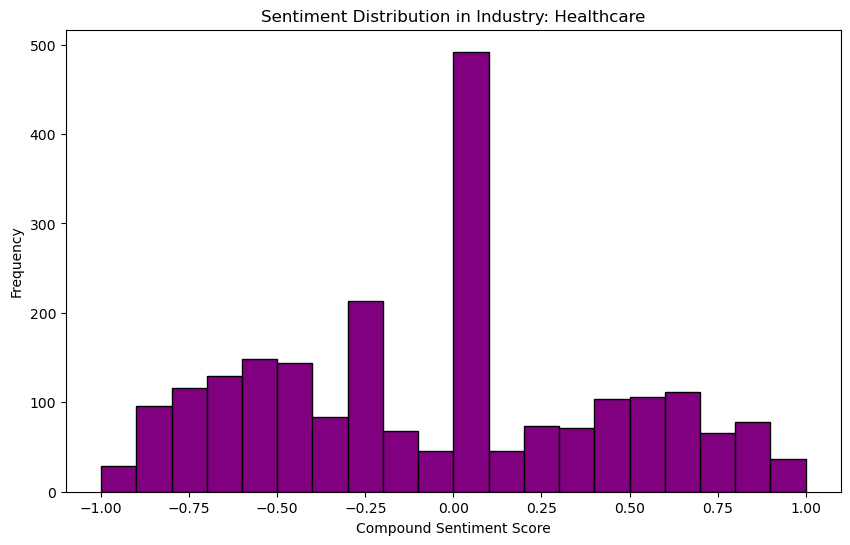

In [26]:
import numpy as np

# Plot sentiment distribution for different sections
sections = train_df['Sentiment'].unique()
for section in sections:
    section_data = train_df[train_df['Sentiment'] == section]
    
    plt.figure(figsize=(10, 6))
    plt.hist(section_data['Compound_Score'], bins=np.arange(-1, 1.1, 0.1), color='skyblue', edgecolor='black')
    plt.title(f'Sentiment Distribution in types: {section}')
    plt.xlabel('Compound Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

# Plot sentiment distribution for different industries
industries = train_df['Industry'].unique()
for industry in industries:
    industry_data = train_df[train_df['Industry'] == industry]
    
    plt.figure(figsize=(10, 6))
    plt.hist(industry_data['Compound_Score'], bins=np.arange(-1, 1.1, 0.1), color='purple', edgecolor='black')
    plt.title(f'Sentiment Distribution in Industry: {industry}')
    plt.xlabel('Compound Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()


## Word Cloud Analysis and Visualization

This code section focuses on creating and visualizing word clouds to analyze the most frequent words within different sentiment sections and industries. The code employs the `WordCloud` library to generate these word clouds. Here's a breakdown of how the code operates:


In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to create word cloud
def create_wordcloud_from_text(text, title, color):
    data = text.split()
    
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=800, 
                   height=400, 
                   max_words=100,
                   colormap=color,
                   max_font_size=200,
                   min_font_size=1,
                   random_state=8888,
                   background_color='white').generate(' '.join(data))
    
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()



### Word Cloud Creation for Industries:

1. **Unique Industries:** The code identifies the unique industries present within the 'Industry' column.

2. **Loop Through Industries:** For each unique industry, the code filters the dataset to include only rows associated with that industry.

3. **Text Extraction:** Similar to the section analysis, the text data from the 'Cleaned_Content' column of the filtered industry is extracted and joined.

4. **Word Cloud Creation:** A word cloud is generated using the extracted text for the specific industry, revealing the most frequent words associated with that industry.

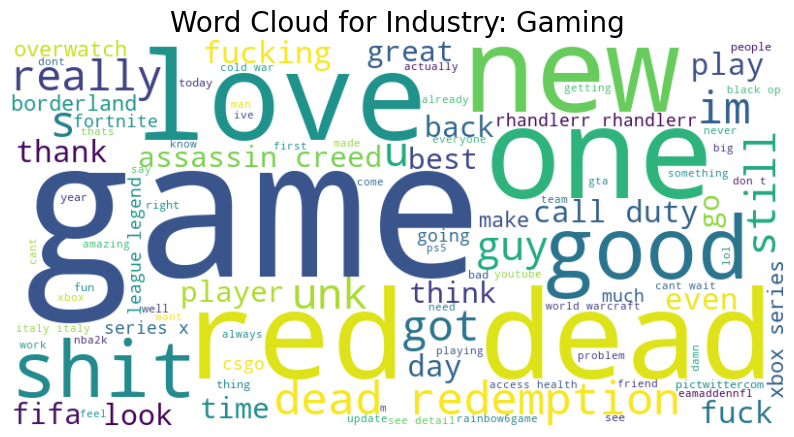

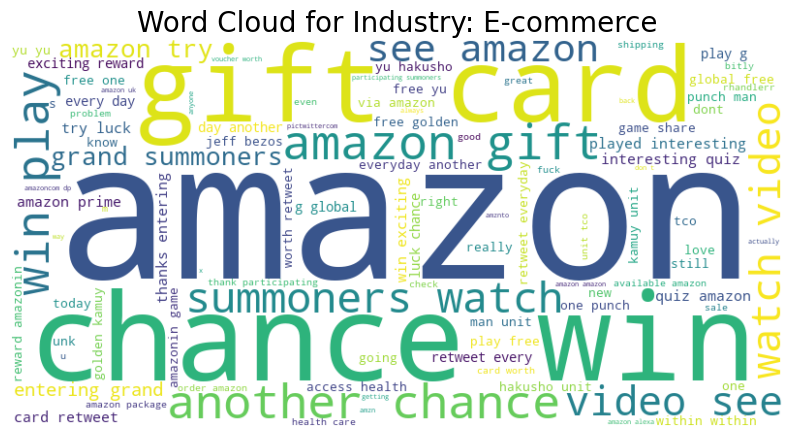

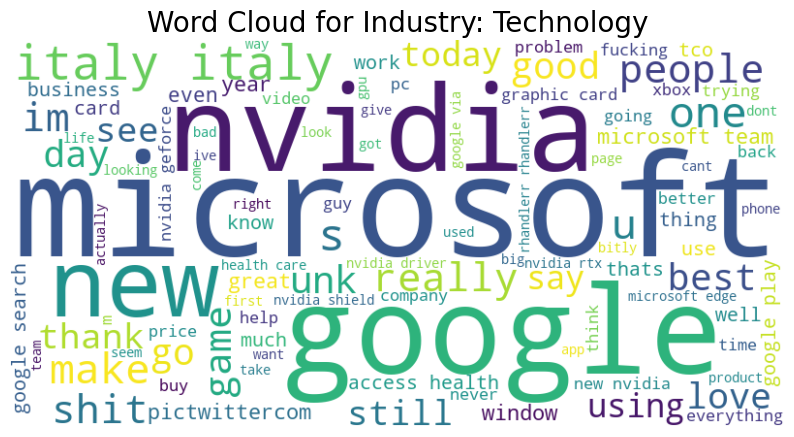

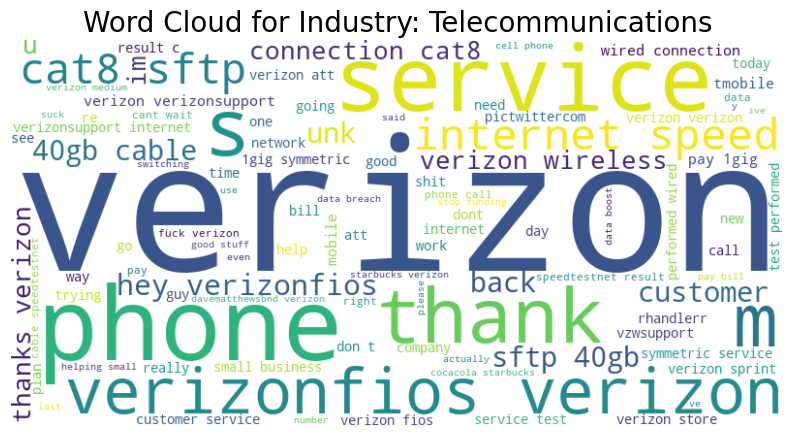

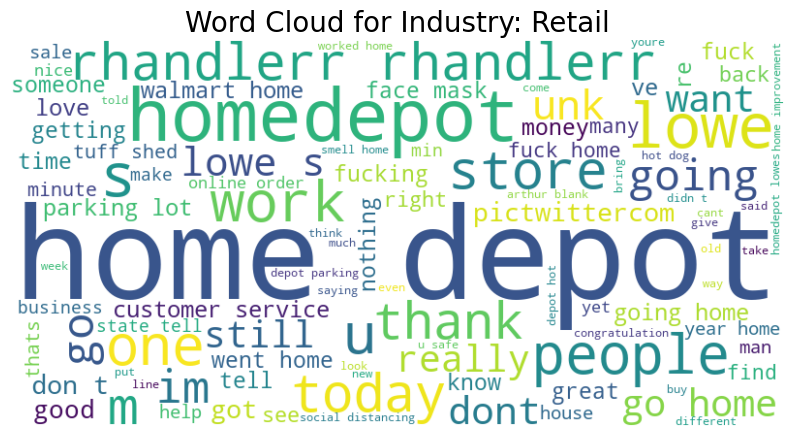

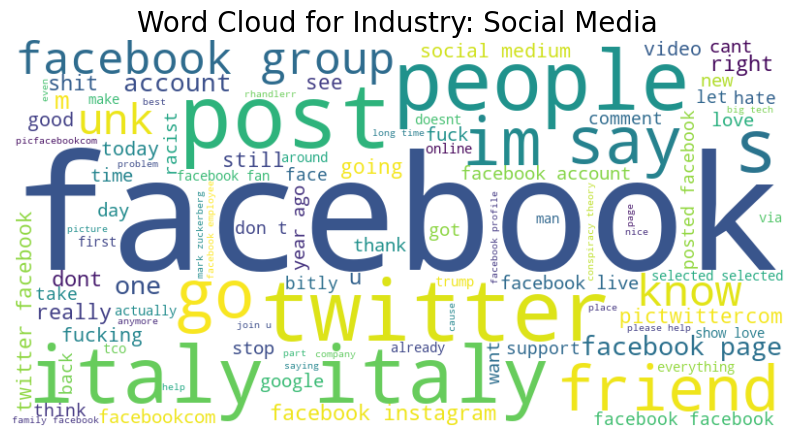

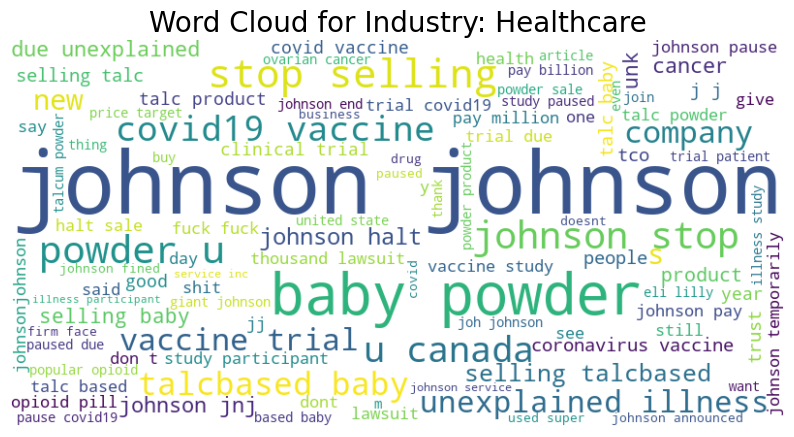

In [30]:
# Create word clouds for different industries
for industry in industries:
    industry_data = train_df[train_df['Industry'] == industry]
    industry_text = ' '.join(industry_data['Cleaned_Content'])
    
    create_wordcloud_from_text(industry_text, f'Word Cloud for Industry: {industry}', 'viridis')

### Word Cloud Creation for Sentiment Sections:

1. **Unique Sections:** The code identifies the unique sentiment categories (Positive, Neutral, Negative) within the 'Sentiment' column.

2. **Loop Through Sections:** For each unique sentiment section, the code filters the dataset to include only rows with that sentiment.

3. **Text Extraction:** The text data from the 'Cleaned_Content' column of the filtered section is extracted and joined to create a single string of cleaned text.

4. **Word Cloud Creation:** Using the extracted text, a word cloud is generated using the `WordCloud` library. The word cloud visualizes the most frequent words within the section's content.

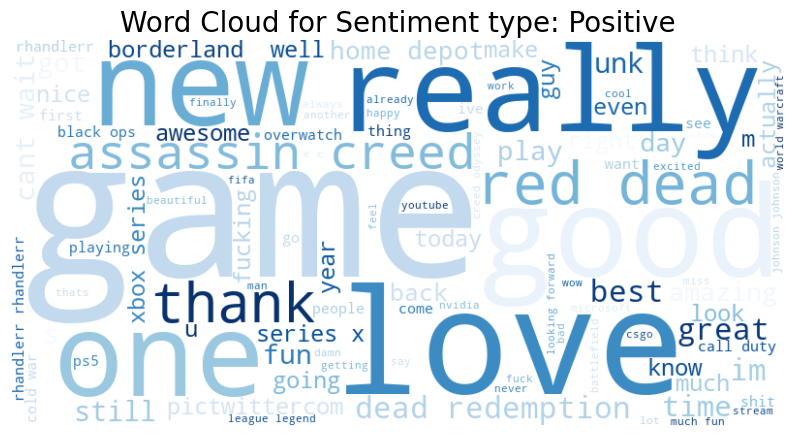

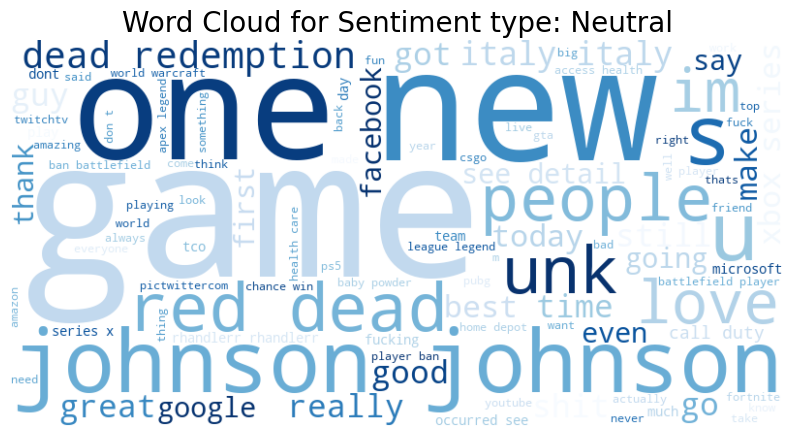

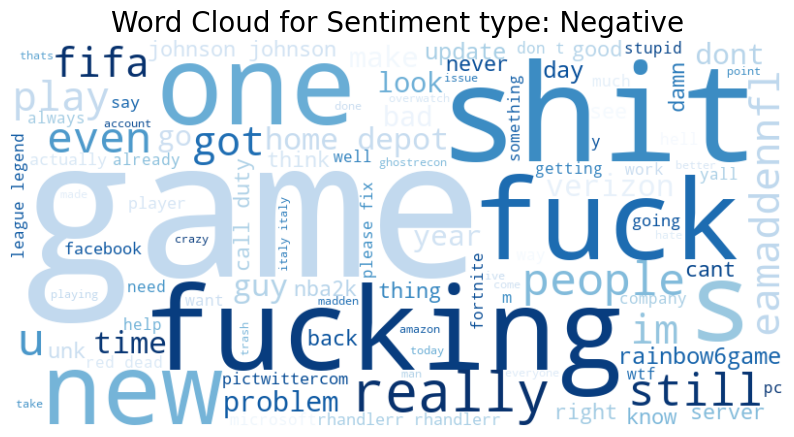

In [31]:
# Create word clouds for different sentiments
for section in sections:
    section_data = train_df[train_df['Sentiment'] == section]
    section_text = ' '.join(section_data['Cleaned_Content'])
    
    create_wordcloud_from_text(section_text, f'Word Cloud for Sentiment type: {section}', 'Blues')

### Interpretation:

The generated word clouds provide visual insights into the most common words associated with different sentiment sections and industries. Larger words in the word cloud represent words that appear more frequently in the respective section or industry's content. Analyzing these word clouds can help identify key themes, topics, and trends in the dataset for various sentiment sections and industries.

word clouds that offer a visually appealing and informative way to comprehend the prominent words within each sentiment section and industry.

# MODELLING

## Text Classification and Hyperparameter Tuning

In this code section, we delve into the realm of text classification using a machine learning pipeline and hyperparameter tuning. The code demonstrates the process of building a text classification model and optimizing its hyperparameters. Here's a step-by-step breakdown:

### Data Preparation and Splitting:

1. **Load and Preprocess Data:** The code assumes that you have loaded and preprocessed your dataset, and it uses the 'Cleaned_Content' column as the feature (X) and the 'Sentiment' column as the target (y).

2. **Train-Test Split:** The data is split into training and testing sets using the `train_test_split` function from `sklearn.model_selection`.

### Creating a Pipeline:

1. **Pipeline Definition:** A machine learning pipeline is created using the `Pipeline` class. The pipeline consists of two components: a TF-IDF vectorizer (`TfidfVectorizer`) for feature extraction and a logistic regression classifier (`LogisticRegression`) for text sentiment classification.

### Hyperparameter Tuning with Grid Search:

1. **Hyperparameter Grid:** Hyperparameters for the TF-IDF vectorizer and the logistic regression classifier are defined in the `params` dictionary. Grid search will explore combinations of these hyperparameters to find the best configuration.

2. **Grid Search with Cross-Validation:** The `GridSearchCV` class is used to perform grid search with cross-validation. The pipeline and parameter grid are passed as inputs. Cross-validation with three folds and accuracy scoring are specified.

3. **Optimized Hyperparameters:** After the grid search is complete, the optimized hyperparameters are printed using `grid_cv_pipe.best_params_`.

### Model Evaluation:

1. **Prediction on Test Data:** The optimized model is used to predict sentiment labels for the test data.

2. **Accuracy Score:** The accuracy of the model's predictions on the test data is calculated using the `accuracy_score` function from `sklearn.metrics`.

### Interpretation:

By executing this code, you construct a text classification pipeline, optimize its hyperparameters, and evaluate its performance. The resulting optimized hyperparameters and accuracy score provide valuable insights into the effectiveness of the text classification model in predicting sentiment labels based on cleaned content.

This process highlights the application of machine learning techniques to text data for sentiment analysis and demonstrates the importance of hyperparameter tuning in achieving the best model performance.

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming you have already loaded your dataset and preprocessed it
# Replace train_df with your actual dataframe
X = train_df['Cleaned_Content']
y = train_df['Sentiment']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Feature Extraction
text_vectorizer = TfidfVectorizer(max_features=1000)

# 3. Model Building
model = Pipeline([
    ('tfidf_vect', text_vectorizer),
    ('classifier', LogisticRegression(solver='liblinear', multi_class='auto'))
])

# 4. Hyperparameter Tuning using GridSearchCV
params = {
    'tfidf_vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidf_vect__max_df': [0.5, 0.75, 1.0],
    'classifier__C': [0.1, 1, 10]
}

grid_cv_pipe = GridSearchCV(model, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_pipe.fit(X_train, y_train)

# Print the best hyperparameters
print('Optimized Hyperparameters:', grid_cv_pipe.best_params_)

# 5. Model Evaluation
y_pred = grid_cv_pipe.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Optimized Hyperparameters: {'classifier__C': 1, 'tfidf_vect__max_df': 0.5, 'tfidf_vect__ngram_range': (1, 1)}
              precision    recall  f1-score   support

    Negative       0.67      0.63      0.65      4383
     Neutral       0.62      0.70      0.66      6072
    Positive       0.62      0.53      0.57      3877

    accuracy                           0.63     14332
   macro avg       0.63      0.62      0.63     14332
weighted avg       0.63      0.63      0.63     14332

